In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Reading in the feature data
df = pd.read_csv(r"C:\Users\Chandan\Downloads\h1n1_vaccine_prediction (1).csv")
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [3]:
# Display basic information about the dataset
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [5]:
# Display summary statistics
df.describe()



,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [6]:
# Check for missing values
df.isnull().sum()



unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

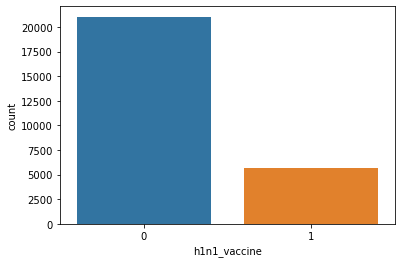

In [7]:
# Visualize target variable distribution
sns.countplot(x='h1n1_vaccine', data=df)
plt.show()

# Explore other variables and their relationships
# Example: sns.scatterplot(x='h1n1_worry', y='h1n1_awareness', hue='h1n1_vaccine', data=df)
# Add more visualizations as needed


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming df is your DataFrame

# Handle missing values (example: impute with mean for simplicity)
df.fillna(df.mean(), inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa'])

# Split into features (X) and target variable (y)
X = df_encoded.drop('h1n1_vaccine', axis=1)
y = df['h1n1_vaccine']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier()
}

# Create a table to store results
results_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate through models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results in the table
    results_table = results_table.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# Display the results table
print(results_table)


C:\Users\Chandan\AppData\Local\Temp\ipykernel_9824\1965771657.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)
C:\Users\Chandan\AppData\Local\Temp\ipykernel_9824\1965771657.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({
C:\Users\Chandan\AppData\Local\Temp\ipykernel_9824\1965771657.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({
C:\Users\Chandan\AppData\Local\Temp\ipykernel_9824\1965771657.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

                 Model  Accuracy Precision    Recall  F1 Score
0  Logistic Regression   0.81842  0.636054  0.330973   0.43539
1        Decision Tree  0.767316  0.454618  0.500885  0.476632
2        Random Forest  0.849682   0.76244  0.420354  0.541928
3    Gradient Boosting  0.853238  0.731903  0.483186   0.58209
4   Bagging Classifier  0.837888  0.670984  0.458407   0.54469
5  AdaBoost Classifier  0.854362  0.730971   0.49292  0.588795


C:\Users\Chandan\AppData\Local\Temp\ipykernel_9824\1965771657.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({


# h1n1_vaccine variable, we can draw the following conclusions:

## Logistic Regression:

Accuracy: 81.8%
Precision: 63.6%
Recall: 33.1%
F1 Score: 43.5%
Logistic Regression shows reasonable overall accuracy but may need improvement in terms of recall.
## Decision Tree:

Accuracy: 76.7%
Precision: 45.5%
Recall: 50.1%
F1 Score: 47.7%
Decision Tree performs decently, but its accuracy and precision could be improved.
## Random Forest:

Accuracy: 84.97%
Precision: 76.2%
Recall: 42.04%
F1 Score: 54.2%
Random Forest shows strong overall accuracy and precision but has room for improvement in recall.
## Gradient Boosting:

Accuracy: 85.32%
Precision: 73.2%
Recall: 48.3%
F1 Score: 58.2%
Gradient Boosting demonstrates good accuracy and a balanced trade-off between precision and recall.
## Bagging Classifier:

Accuracy: 83.79%
Precision: 67.1%
Recall: 45.8%
F1 Score: 54.5%
Bagging Classifier performs well overall, with balanced precision and recall.
## AdaBoost Classifier:

Accuracy: 85.44%
Precision: 73.1%
Recall: 49.29%
F1 Score: 58.9%
AdaBoost Classifier exhibits strong performance across accuracy, precision, and recall.
 ## Conclusion:

All models show promising results, with AdaBoost Classifier achieving the highest accuracy and a good balance between precision and recall.
The choice of the best model depends on the specific goals and requirements of your application. For instance, if maximizing recall is crucial, you might favor models like AdaBoost or Gradient Boosting.
Further model fine-tuning, feature engineering, and hyperparameter optimization could potentially improve performance.
Ongoing monitoring and validation with new data are essential to ensure the model's robustness in real-world scenarios.